In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import random
import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

print("Packages Installed")

Packages Installed


**Downloading Brain Stroke CT scan data from Kaggle**





In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("afridirahman/brain-stroke-ct-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 60.4M/60.4M [00:04<00:00, 15.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/afridirahman/brain-stroke-ct-image-dataset/versions/1


In [ ]:
normal_path = "/root/.cache/kagglehub/datasets/afridirahman/brain-stroke-ct-image-dataset/versions/1/Brain_Data_Organised/Normal"
stroke_path = "/root/.cache/kagglehub/datasets/afridirahman/brain-stroke-ct-image-dataset/versions/1/Brain_Data_Organised/Stroke"

In [ ]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [ ]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [ ]:
# Equalizing the classes

import shutil
import random


# Define the target number of normal images
target_normal_count = 950

# Get a list of normal images
normal_images = os.listdir(normal_path)

# Randomly select images to delete
images_to_delete = random.sample(normal_images, len(normal_images) - target_normal_count)

# Delete the selected images
for image in images_to_delete:
    image_path = os.path.join(normal_path, image)
    try:
        os.remove(image_path)
    except OSError as e:
        print(f"Error deleting {image_path}: {e}")

In [ ]:
# Verify the number of normal images
normal_folder = os.listdir(normal_path)
print("Images in Normal Data (after equalization):", len(normal_folder))
print("Images in Stroke Data:", len(stroke_folder))

Images in Normal Data (after equalization): 950
Images in Stroke Data: 950


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import os

# Labels and class mapping
classes = {"normal": 0, "stroke": 1}
images = []
labels = []

# Load and preprocess images
for label, folder_path in zip(classes.values(), [normal_path, stroke_path]):
    for img_file in os.listdir(folder_path):  # Loop through each folder
        image_path = os.path.join(folder_path, img_file)  # Full path to image
        image = Image.open(image_path)
        image = image.resize((224, 224))  # Resize to desired input size
        image = image.convert('RGB')  # Ensure 3 color channels
        image = np.array(image)  # Convert to NumPy array
        images.append(image)
        labels.append(label)  # Append corresponding label

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=42, stratify=labels
)

# # One-hot encode labels
# y_train = to_categorical(y_train, num_classes=2)
# y_test = to_categorical(y_test, num_classes=2)

print(f"Training Data: {x_train.shape}, Training Labels: {y_train.shape}")
print(f"Test Data: {x_test.shape}, Test Labels: {y_test.shape}")


Training Data: (1330, 224, 224, 3), Training Labels: (1330,)
Test Data: (570, 224, 224, 3), Test Labels: (570,)


In [ ]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np
# from PIL import Image
# import os

# # Labels and class mapping
# classes = {"normal": 0, "stroke": 1}
# images = []
# labels = []

# # Load and preprocess images
# for label, folder_path in zip(classes.values(), [normal_path, stroke_path]):
#     for img_file in os.listdir(folder_path):  # Loop through each folder
#         image_path = os.path.join(folder_path, img_file)  # Full path to image
#         image = Image.open(image_path)
#         image = image.resize((224, 224))  # Resize to desired input size
#         image = image.convert('RGB')  # Ensure 3 color channels
#         image = np.array(image)  # Convert to NumPy array
#         images.append(image)
#         labels.append(label)  # Append corresponding label

# # Convert lists to NumPy arrays
# images = np.array(images)
# labels = np.array(labels)

# # Split data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(
#     images, labels, test_size=0.3, random_state=42, stratify=labels
# )

# # # One-hot encode labels
# # y_train = to_categorical(y_train, num_classes=2)
# # y_test = to_categorical(y_test, num_classes=2)

# print(f"Training Data: {x_train.shape}, Training Labels: {y_train.shape}")
# print(f"Test Data: {x_test.shape}, Test Labels: {y_test.shape}")

# # Data augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,           # Normalize pixel values to [0, 1]
#     rotation_range=20,           # Random rotation
#     width_shift_range=0.2,       # Horizontal shift
#     height_shift_range=0.2,      # Vertical shift
#     shear_range=0.2,             # Shear transformation
#     zoom_range=0.2,              # Random zoom
#     horizontal_flip=True,        # Random horizontal flip
#     fill_mode='nearest'          # Fill missing pixels
# )

# # For the test set, only normalize pixel values
# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# # Fit the data augmentation generator to training data
# train_generator = train_datagen.flow(
#     x_train, y_train,
#     batch_size=32,  # Adjust batch size as needed
#     shuffle=True
# )

# # Prepare the test generator
# test_generator = test_datagen.flow(
#     x_test, y_test,
#     batch_size=32,
#     shuffle=False
# )

# # Example of accessing augmented data
# for batch_images, batch_labels in train_generator:
#     print(f"Augmented Batch Images Shape: {batch_images.shape}")
#     print(f"Augmented Batch Labels Shape: {batch_labels.shape}")
#     break


Training Data: (1330, 224, 224, 3), Training Labels: (1330, 2)
Test Data: (570, 224, 224, 3), Test Labels: (570, 2)
Augmented Batch Images Shape: (32, 224, 224, 3)
Augmented Batch Labels Shape: (32, 2)


### Image Data visualization

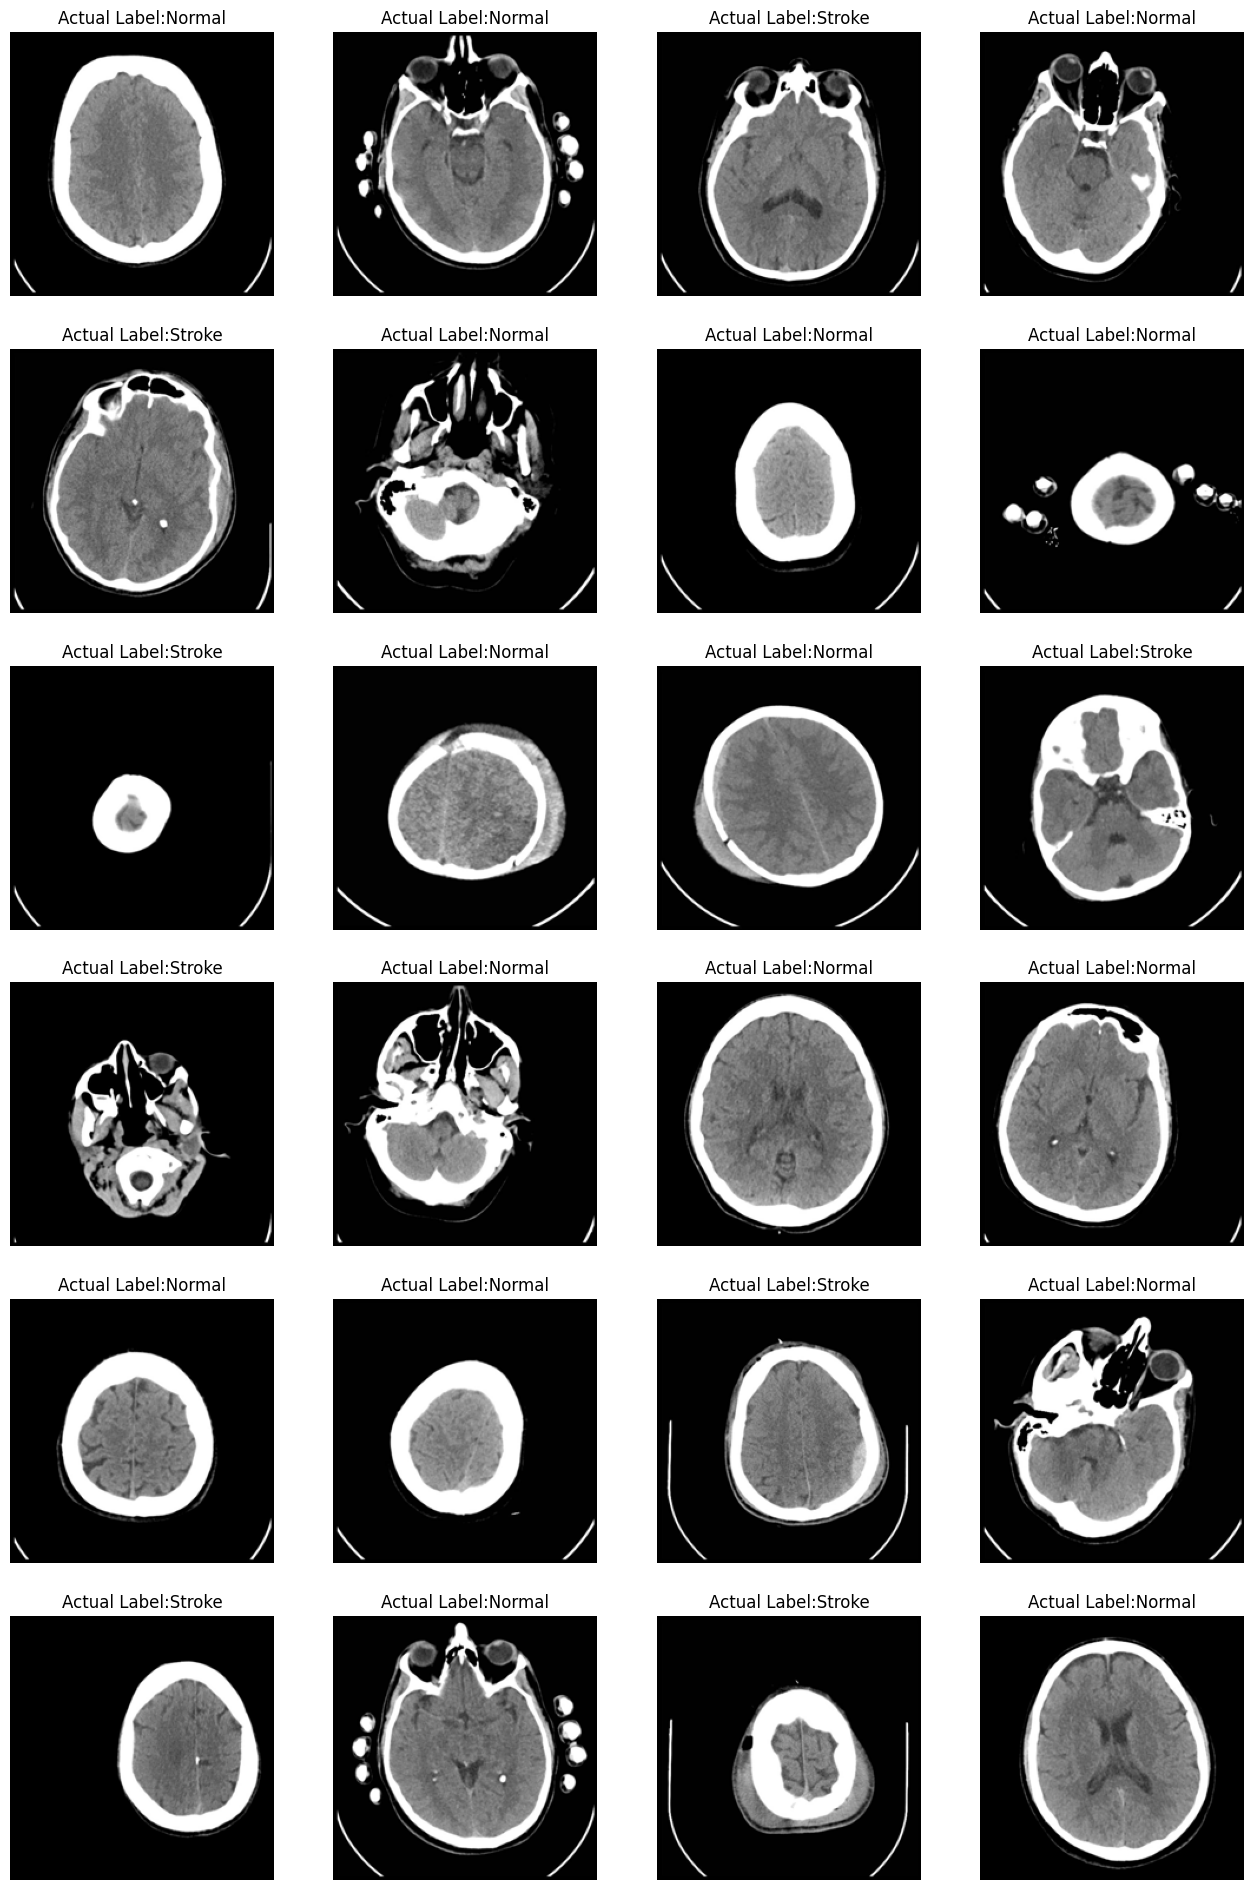

In [ ]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    # Get the index of the actual class label using argmax
    label_index = np.argmax(y_train[i])
    plt.title(f"Actual Label:{class_labels[label_index]}")  # Use label_index to access class_labels
    plt.axis("off")

In [ ]:
# fuction for plotting Accuracy and loss curves
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)     # get number of epoch with the lowest validation loss
    val_lowest = val_loss[index_loss]    # get the loss value of epoch with the lowest validation loss
    index_acc = np.argmax(val_acc)       # get number of epoch with the highest validation accuracy
    acc_highest = val_acc[index_acc]     # get the loss value of epoch with the highest validation accuracy

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]	       # create x-axis by epochs count
    loss_label = f'best epoch= {str(index_loss + 1)}'  # label of lowest val_loss
    acc_label = f'best epoch= {str(index_acc + 1)}'    # label of highest val_accuracy
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

### Testing different approaches

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
inception_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"


In [ ]:
import tf_keras

In [ ]:
# Define the CNN model (ResNet-based)
resnet_model = tf_keras.Sequential([
  hub.KerasLayer(resnet_url, trainable=True, input_shape=(224, 224, 3)),
  tf_keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf_keras.layers.BatchNormalization(),
  tf_keras.layers.Dropout(0.3),
  tf_keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
resnet_model.compile(
  loss="binary_crossentropy",
  optimizer=tf_keras.optimizers.Adam(learning_rate=0.00017),
  metrics=["accuracy"]
)

# Train the model
resnet_history = resnet_model.fit(
  x_train, y_train,
  epochs=30,
  validation_data=(x_test, y_test),
  batch_size=16,
  verbose=1
)

# resnet_history = resnet_model.fit(
#     train_generator,
#     steps_per_epoch=len(x_train) // 32,
#     epochs=30,
#     validation_data=test_generator,
#     validation_steps=len(x_test) // 32
# )


Epoch 1/30
84/84 [==============================] - 44s 213ms/step - loss: 1.1564 - accuracy: 0.6662 - val_loss: 1.2356 - val_accuracy: 0.5895
Epoch 2/30
84/84 [==============================] - 15s 180ms/step - loss: 0.7770 - accuracy: 0.8586 - val_loss: 1.8013 - val_accuracy: 0.6456
Epoch 3/30
84/84 [==============================] - 15s 176ms/step - loss: 0.7089 - accuracy: 0.8917 - val_loss: 0.6814 - val_accuracy: 0.9140
Epoch 4/30
84/84 [==============================] - 15s 176ms/step - loss: 0.5978 - accuracy: 0.9451 - val_loss: 0.9220 - val_accuracy: 0.8632
Epoch 5/30
84/84 [==============================] - 15s 176ms/step - loss: 0.6750 - accuracy: 0.9105 - val_loss: 0.6251 - val_accuracy: 0.9386
Epoch 6/30
84/84 [==============================] - 15s 178ms/step - loss: 0.5337 - accuracy: 0.9677 - val_loss: 0.8987 - val_accuracy: 0.8614
Epoch 7/30
84/84 [==============================] - 15s 179ms/step - loss: 0.5236 - accuracy: 0.9737 - val_loss: 0.6997 - val_accuracy: 0.9088

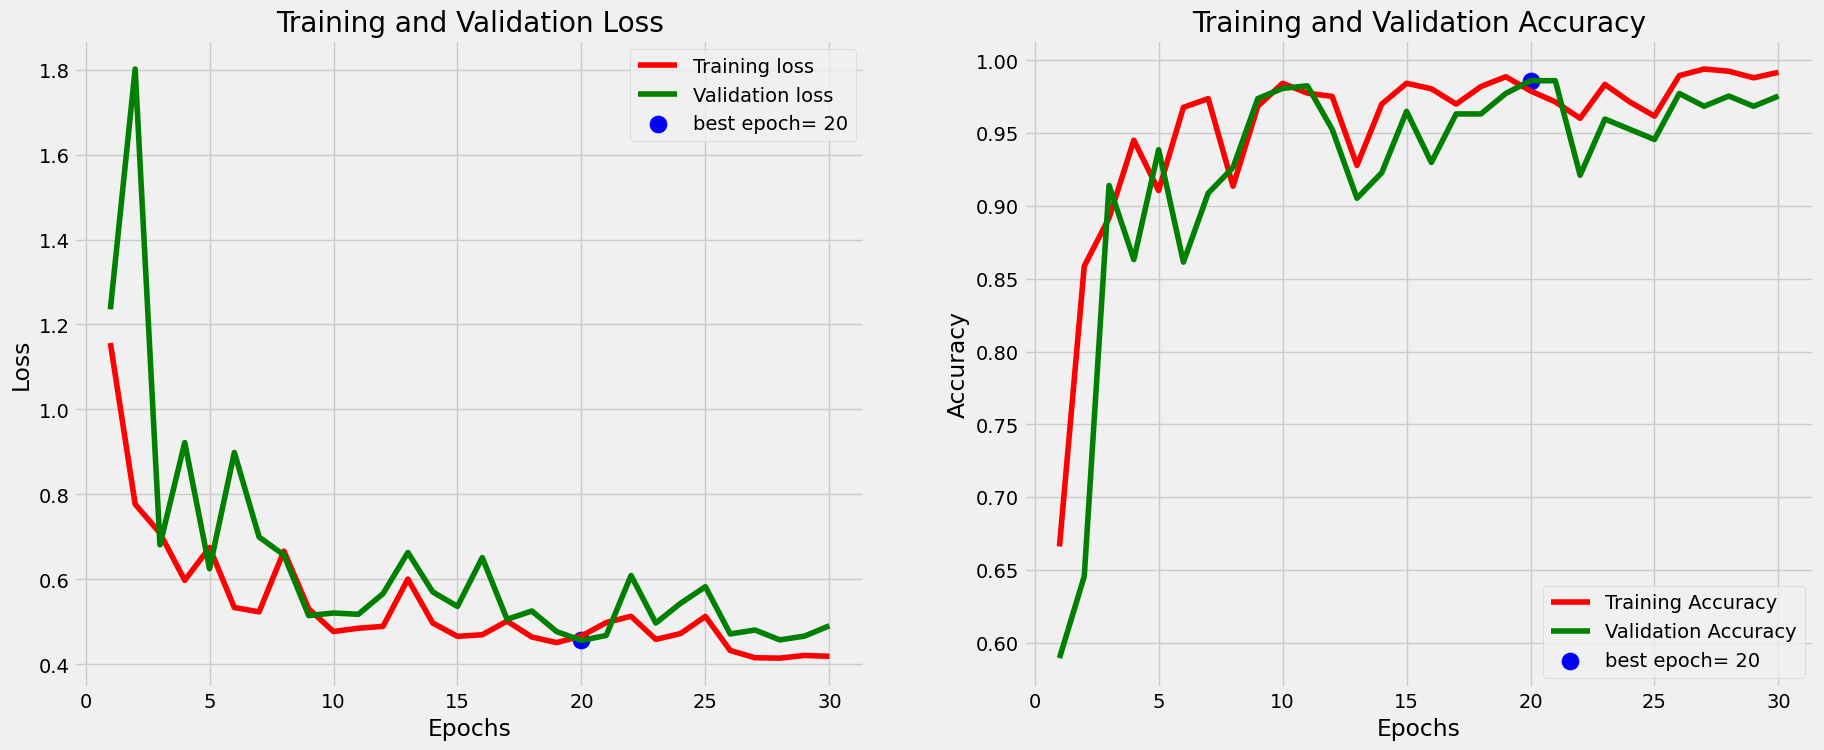

In [ ]:
plot_training(resnet_history)

In [ ]:
# Get predicted probabilities
y_pred4 = resnet_model.predict(x_test)  # Output shape: (num_samples, 1)

# Convert probabilities to class labels (0 or 1)
y_pred4_labels = (y_pred4 > 0.5).astype(int).flatten()  # Flatten to match shape of y_test


18/18 [==============================] - 1s 86ms/step


In [ ]:
from sklearn import metrics
import numpy as np

print("Performance Report:")

# Ensure y_test is in the correct format (flattened binary labels)
y_test4 = np.array(y_test).flatten()  # Convert from (num_samples, 1) to (num_samples,)

# Accuracy
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test4, y_pred4_labels), 4))

# Precision
print('Precision score is :', np.round(metrics.precision_score(y_test4, y_pred4_labels, average='binary'), 4))

# Recall
print('Recall score is :', np.round(metrics.recall_score(y_test4, y_pred4_labels, average='binary'), 4))

# F1 Score
print('F1 Score is :', np.round(metrics.f1_score(y_test4, y_pred4_labels, average='binary'), 4))

# ROC AUC Score (Use probability values, not labels)
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test4, y_pred4), 4))

# Cohen Kappa Score
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test4, y_pred4_labels), 4))

# Classification Report
target_names = ["N", "S"]
print('\t\tClassification Report:\n', metrics.classification_report(y_test4, y_pred4_labels, target_names=target_names))


Performance Report:
Accuracy score is : 0.9754
Precision score is : 0.9822
Recall score is : 0.9684
F1 Score is : 0.9753
ROC AUC Score is : 0.9898
Cohen Kappa Score: 0.9509
		Classification Report:
               precision    recall  f1-score   support

           N       0.97      0.98      0.98       285
           S       0.98      0.97      0.98       285

    accuracy                           0.98       570
   macro avg       0.98      0.98      0.98       570
weighted avg       0.98      0.98      0.98       570



In [ ]:
# Define save path in Google Drive
save_path = '/content/drive/My Drive/models/resnet_sigmoid_model'

# Save the model
resnet_model.save(save_path)
print(f"Model saved to: {save_path}")

# Alternatively, save in HDF5 format
resnet_model.save(save_path + '.h5')
print(f"Model saved to: {save_path}.h5")

Model saved to: /content/drive/My Drive/models/resnet_sigmoid_model
Model saved to: /content/drive/My Drive/models/resnet_sigmoid_model.h5


In [ ]:
test_normal_image_1 = "/content/drive/MyDrive/Brain_Data_Organised/Normal/100 (1).jpg"
test_normal_image_2 = "/content/drive/MyDrive/Brain_Data_Organised/Normal/102 (15).jpg"
test_normal_image_3 = "/content/drive/MyDrive/Brain_Data_Organised/Normal/103 (26).jpg"
test_normal_image_4 = "/content/drive/MyDrive/Brain_Data_Organised/Normal/106 (14).jpg"
test_normal_image_5 = "/content/drive/MyDrive/Brain_Data_Organised/Normal/110 (19).jpg"

test_stroke_image_1 = "/content/drive/MyDrive/Brain_Data_Organised/Stroke/58 (1).jpg"
test_stroke_image_2 = "/content/drive/MyDrive/Brain_Data_Organised/Stroke/69 (1).jpg"
test_stroke_image_3 = "/content/drive/MyDrive/Brain_Data_Organised/Stroke/72 (32).jpg"
test_stroke_image_4 = "/content/drive/MyDrive/Brain_Data_Organised/Stroke/78 (2).jpg"
test_stroke_image_5 = "/content/drive/MyDrive/Brain_Data_Organised/Stroke/81 (43).jpg"


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the model from the SavedModel format
save_path = "/content/drive/My Drive/models/resnet_sigmoid_model"
model = tf.keras.models.load_model(save_path)

def predict_image(image_path, model=model, target_size=(224, 224), threshold=0.5):
    """
    Loads an image, preprocesses it, and makes a prediction using the loaded model.

    Parameters:
    - image_path: Path to the image file.
    - model: Loaded TensorFlow model.
    - target_size: Tuple specifying the target image size (default: (224, 224)).
    - threshold: Decision threshold for classification (default: 0.5 for sigmoid output).

    Returns:
    - pred_class: Predicted class label.
    - confidence: Predicted confidence score.
    """
    # Load and preprocess the image
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    preds = model.predict(image)

    # Convert probability to class
    pred_class = "Potential Stroke Detected. Immediate medical evaluation is advised!" if preds[0] > threshold else "No Stroke Indicators Detected."
    confidence = float(preds[0])  # Convert NumPy value to float

    return pred_class, confidence



ValueError: File format not supported: filepath=/content/drive/My Drive/models/resnet_sigmoid_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/drive/My Drive/models/resnet_sigmoid_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
prediction, confidence = predict_image(test_image_path, model)
print(f"Prediction: {prediction}, Confidence: {confidence}")

In [ ]:
model_path = '/content/drive/My Drive/models/resnet_sigmoid_model.h5'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd
import altair as alt
import tensorflow_hub as hub
import tf_keras

def predict_image(image, model):
    # Load model
    model = tf_keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})
    # Load and preprocess the image
    image = load_img(image, target_size=(224, 224))  # Resize to model's input size
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make prediction
    preds = model.predict(image)

    # Convert probability to class
    pred_class = "Potential Stroke Detected. Immediate medical evaluation is advised!" if preds[0] > 0.5 else "No Stroke Indicators Detected."
    pred_conf = float(preds[0])  # Convert NumPy value to float

    return pred_class, pred_conf

In [ ]:
print(predict_image(test_normal_image_1, model_path))

1/1 [==============================] - 3s 3s/step
('No Stroke Indicators Detected.', 0.23747922480106354)


<ipython-input-17-4f4546c89a7b>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_conf = float(preds[0])  # Convert NumPy value to float


In [ ]:
print(predict_image(test_stroke_image_2, model_path))

1/1 [==============================] - 0s 477ms/step
('No Stroke Indicators Detected.', 0.23245331645011902)


<ipython-input-17-4f4546c89a7b>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_conf = float(preds[0])  # Convert NumPy value to float


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image_class(image_path, model=resnet_model, target_size=(224, 224), threshold=0.5):
    """
    Loads an image, preprocesses it, and makes a prediction using the given model.

    Parameters:
    - model: Trained Keras model for prediction.
    - image_path: Path to the image file.
    - target_size: Tuple specifying the target image size (default: (224, 224)).
    - threshold: Decision threshold for classification (default: 0.5 for sigmoid output).

    Returns:
    - pred_class: Predicted class (0 or 1).
    - confidence: Predicted confidence score.
    """
    # Load and preprocess image
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)  # Convert to array
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    preds = model.predict(image)

    # Convert probability to class
    pred_class = 1 if preds[0] > threshold else 0
    confidence = float(preds[0])  # Convert NumPy value to float

    return pred_class, confidence

In [ ]:
predict_image_class(test_normal_image_3)

1/1 [==============================] - 0s 23ms/step


(0, 0.0006180733325891197)

In [ ]:
predict_image_class(test_stroke_image_3)

1/1 [==============================] - 0s 22ms/step


(1, 0.9999194145202637)

In [ ]:
predict_image_class(test_normal_image_1)

1/1 [==============================] - 0s 22ms/step


(0, 0.006675157230347395)

In [ ]:
predict_image_class(test_stroke_image_1)

1/1 [==============================] - 0s 22ms/step


(0, 0.10652551054954529)

In [ ]:
predict_image_class(test_normal_image_2)

1/1 [==============================] - 0s 21ms/step


(0, 0.0021866278257220984)

In [ ]:
predict_image_class(test_stroke_image_2)

1/1 [==============================] - 0s 27ms/step


(1, 0.9990284442901611)

In [ ]:
predict_image_class(test_normal_image_4)

1/1 [==============================] - 0s 26ms/step


(0, 0.007967552170157433)

In [ ]:
predict_image_class(test_stroke_image_4)

1/1 [==============================] - 0s 22ms/step


(1, 1.0)

In [ ]:
predict_image_class(test_normal_image_5)

1/1 [==============================] - 0s 23ms/step


(0, 0.0008604848408140242)

In [ ]:
predict_image_class(test_stroke_image_5)

1/1 [==============================] - 0s 23ms/step


(1, 0.9992091059684753)